Folder Setup

In [107]:
import os
import shutil
import pandas as pd

# Create required folders
os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

# List of raw CSVs to organize
raw_files = [
    "fear_greed_index.csv",
    "historical_data.csv"
]

# Move files into csv_files folder if they exist
for file in raw_files:
    src = f"/content/{file}"
    dst = f"/content/csv_files/{file}"

    if os.path.exists(src) and not os.path.exists(dst):
        shutil.move(src, dst)

# Load datasets
fg = pd.read_csv("csv_files/fear_greed_index.csv")
trades = pd.read_csv("csv_files/historical_data.csv")

# Quick sanity check
print("Files in csv_files:", os.listdir("csv_files"))
print("Fear-Greed shape:", fg.shape)
print("Trades shape:", trades.shape)


Files in csv_files: ['historical_data.csv', 'fear_greed_index.csv']
Fear-Greed shape: (2644, 4)
Trades shape: (211224, 16)


Import and Data Exploration

In [109]:
#Import the Dataset.
import pandas as pd
fg = pd.read_csv("csv_files/fear_greed_index.csv")


In [110]:
fg.head()
fg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [111]:
#lowercase + snake_case
fg.columns = (
    fg.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)


In [112]:
fg.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [113]:
#convert date to datetime
fg['date'] = pd.to_datetime(fg['date'], format='%d-%m-%Y')

In [114]:
fg.dtypes

,0
timestamp,int64
value,int64
classification,object
date,datetime64[ns]


In [115]:
#sort by date
fg = fg.sort_values('date').reset_index(drop=True)

In [116]:
#one sentiment per date
fg['date'].is_unique

True

In [117]:
#sentiment labels
fg['classification'].value_counts()

,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [118]:
fg.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [119]:
fg.tail()

,timestamp,value,classification,date
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01
2643,1746163800,67,Greed,2025-05-02


In [120]:
import pandas as pd
trades = pd.read_csv("csv_files/historical_data.csv")

In [121]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [122]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [123]:
trades.columns = (
    trades.columns
          .str.strip()
          .str.lower()
          .str.replace(" ", "_")
)

trades.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')

In [124]:
trades['timestamp_ist'] = pd.to_datetime(
    trades['timestamp_ist'],
    format='%d-%m-%Y %H:%M'
)

In [125]:
trades = trades.sort_values('timestamp_ist').reset_index(drop=True)

In [126]:
trades.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.08240,156.39,BUY,2023-05-01 01:06:00,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12
1,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.07220,137.08,BUY,2023-05-01 01:06:00,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12
2,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.09670,183.53,BUY,2023-05-01 01:06:00,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12
3,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41866.0,0.58211,24370.62,SELL,2023-12-05 03:11:00,-0.0150,Open Short,0.0,0xd2e598f2a6ca3f77dc7b04065f9e8a0139006b7925f4...,4064974623,True,6.092654,2.830000e+14,1.700000e+12
4,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41867.0,0.01500,628.00,SELL,2023-12-05 03:11:00,0.0000,Open Short,0.0,0xd2e598f2a6ca3f77dc7b04065f9e8a0139006b7925f4...,4064974623,True,0.157001,1.070000e+15,1.700000e+12


Tables Aggregation

In [ ]:
#Create trade_date in trader data
trades['trade_date'] = trades['timestamp_ist'].dt.date

#Create matching date column in sentiment data
fg['trade_date'] = fg['date'].dt.date

#Perform alignment (LEFT JOIN)
trades_sentiment = trades.merge(
    fg[['trade_date', 'classification']],
    on='trade_date',
    how='left'
)

#Validate alignment
# Check sentiment coverage
trades_sentiment['classification'].isna().mean()

# Distribution
trades_sentiment['classification'].value_counts(dropna=False)


,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400
NaN,6


Feature Engineering

In [136]:
#Create win / loss flag
trades_sentiment['is_win'] = (trades_sentiment['closed_pnl'] > 0).astype(int)
#Absolute trade size (behavioral)
trades_sentiment['abs_trade_size_usd'] = trades_sentiment['size_usd'].abs()
#Net PnL including fees (important)
trades_sentiment['net_pnl'] = trades_sentiment['closed_pnl'] - trades_sentiment['fee']

#Group & aggregate
trader_sentiment_features = (
    trades_sentiment
    .groupby(['account', 'classification'])
    .agg(
        num_trades=('trade_id', 'count'),
        total_pnl=('net_pnl', 'sum'),
        avg_pnl_per_trade=('net_pnl', 'mean'),
        win_rate=('is_win', 'mean'),
        pnl_std=('net_pnl', 'std'),
        avg_trade_size_usd=('abs_trade_size_usd', 'mean'),
        avg_fee=('fee', 'mean')
    )
    .reset_index()
)

In [137]:
#Risk-adjusted proxy
trader_sentiment_features['sharpe_proxy'] = (
    trader_sentiment_features['avg_pnl_per_trade'] /
    trader_sentiment_features['pnl_std']
)

In [138]:
# Save processed trade-level data
trades_sentiment.to_csv(
    "csv_files/trades_sentiment.csv",
    index=False
)

# Save trader-level aggregated features
trader_sentiment_features.to_csv(
    "csv_files/trader_sentiment_features.csv",
    index=False
)

print("Processed trader CSVs saved successfully.")


Processed trader CSVs saved successfully.


In [ ]:
trader_sentiment_features.head()
trader_sentiment_features.describe()

,num_trades,total_pnl,avg_pnl_per_trade,win_rate,pnl_std,avg_trade_size_usd,avg_fee,sharpe_proxy
count,156.000000,1.560000e+02,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,1353.961538,6.415793e+04,165.619358,0.377364,775.824752,6080.208255,1.231576,0.125798
std,2140.102524,1.656273e+05,762.743162,0.217750,1524.933864,7613.529864,1.754776,0.250473
min,2.000000,-3.607693e+05,-383.187490,0.000000,0.090653,71.234000,0.023962,-0.786543
25%,111.000000,8.815213e+01,2.123115,0.270773,65.863494,1579.563110,0.237213,0.028445
50%,426.000000,1.254344e+04,22.289432,0.369466,276.776348,2884.891440,0.488298,0.157299
75%,1593.500000,5.875813e+04,103.097394,0.498386,844.148684,7151.792411,1.341189,0.251012
max,12901.000000,1.110128e+06,8282.763261,1.000000,11513.513328,38497.727719,8.382129,0.872870


from matplotlib import pyplot as plt
_df_12['num_trades'].plot(kind='hist', bins=20, title='num_trades')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['total_pnl'].plot(kind='hist', bins=20, title='total_pnl')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['avg_pnl_per_trade'].plot(kind='hist', bins=20, title='avg_pnl_per_trade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['win_rate'].plot(kind='hist', bins=20, title='win_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='num_trades', y='total_pnl', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='total_pnl', y='avg_pnl_per_trade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='avg_pnl_per_trade', y='win_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='win_rate', y='pnl_std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['num_trades'].plot(kind='line', figsize=(8, 4), title='num_trades')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['total_pnl'].plot(kind='line', figsize=(8, 4), title='total_pnl')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['avg_pnl_per_trade'].plot(kind='line', figsize=(8, 4), title='avg_pnl_per_trade')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['win_rate'].plot(kind='line', figsize=(8, 4), title='win_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

Comparative Analysis & Ranking Logic

In [ ]:
#Performance score
trader_sentiment_features['performance_score'] = (
    trader_sentiment_features['total_pnl'] *
    trader_sentiment_features['win_rate']
)

#Risk-adjusted ranking
trader_sentiment_features['risk_adjusted_score'] = (
    trader_sentiment_features['sharpe_proxy']
)

In [ ]:
#Rank by performance score
trader_sentiment_features['rank_perf'] = (
    trader_sentiment_features
    .groupby('classification')['performance_score']
    .rank(ascending=False, method='dense')
)
#Rank by risk-adjusted score
trader_sentiment_features['rank_risk'] = (
    trader_sentiment_features
    .groupby('classification')['risk_adjusted_score']
    .rank(ascending=False, method='dense')
)


In [ ]:
top_traders_by_sentiment = (
    trader_sentiment_features
    .sort_values(['classification', 'rank_perf'])
    .groupby('classification')
    .head(10)
)

In [ ]:
#Pivot for comparison
pivot_perf = trader_sentiment_features.pivot_table(
    index='account',
    columns='classification',
    values='performance_score'
)
#Contrarian signal
pivot_perf['fear_vs_greed_diff'] = (
    pivot_perf[['Fear', 'Extreme Fear']].mean(axis=1) -
    pivot_perf[['Greed', 'Extreme Greed']].mean(axis=1)
)
#Top contrarian traders
contrarian_traders = (
    pivot_perf
    .sort_values('fear_vs_greed_diff', ascending=False)
    .head(10)
)

Questions answered and Visualization

/tmp/ipython-input-4236457723.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


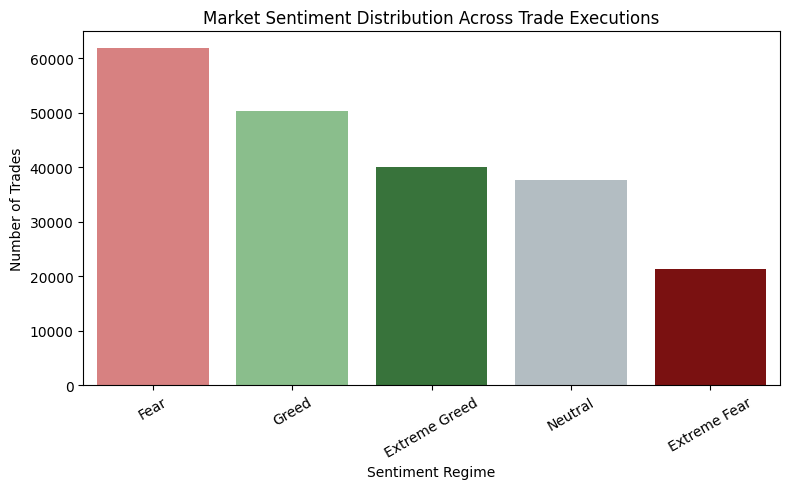

In [127]:
#Q1. How is market sentiment distributed across the dataset?
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_palette = {
    'Extreme Fear': '#8B0000',
    'Fear': '#E57373',
    'Neutral': '#B0BEC5',
    'Greed': '#81C784',
    'Extreme Greed': '#2E7D32'
}

plt.figure(figsize=(8,5))
sns.countplot(
    data=trades_sentiment,
    x='classification',
    order=trades_sentiment['classification'].value_counts().index,
    palette=sentiment_palette
)

plt.title("Market Sentiment Distribution Across Trade Executions")
plt.xlabel("Sentiment Regime")
plt.ylabel("Number of Trades")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("outputs/sentiment_distribution.png")
plt.show()


/tmp/ipython-input-1278771154.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


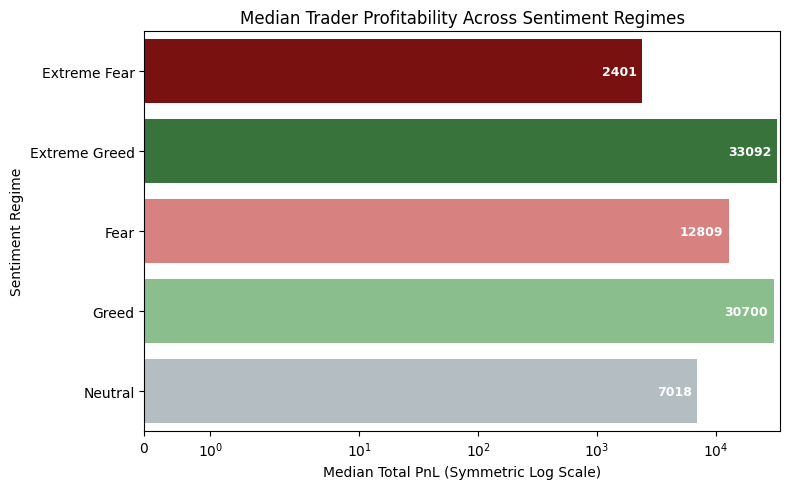

In [128]:
#Q2.Do traders behave differently under different sentiment regimes?

sentiment_palette = {
    'Extreme Fear': '#8B0000',
    'Fear': '#E57373',
    'Neutral': '#B0BEC5',
    'Greed': '#81C784',
    'Extreme Greed': '#2E7D32'
}

pnl_summary = (
    trader_sentiment_features
    .groupby('classification')['total_pnl']
    .median()
    .reset_index()
)

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=pnl_summary,
    y='classification',
    x='total_pnl',
    palette=sentiment_palette
)

plt.xscale('symlog')
plt.title("Median Trader Profitability Across Sentiment Regimes")
plt.xlabel("Median Total PnL (Symmetric Log Scale)")
plt.ylabel("Sentiment Regime")

# Annotate values
for i, row in pnl_summary.iterrows():
    ax.text(
        row['total_pnl'] * 0.9,
        i,
        f"{int(row['total_pnl'])}",
        va='center',
        ha='right',
        fontsize=9,
        color='white',
        fontweight='bold'
    )


plt.tight_layout()
plt.savefig("outputs/median_pnl_by_sentiment_horizontal.png")
plt.show()


/tmp/ipython-input-1863618312.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


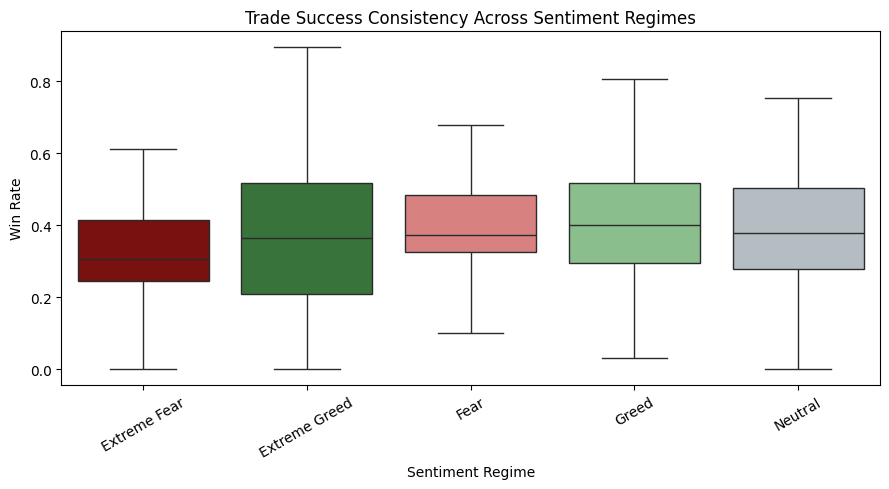

In [129]:
#Visual 3 — Win Rate by Sentiment

sentiment_palette = {
    'Extreme Fear': '#8B0000',
    'Fear': '#E57373',
    'Neutral': '#B0BEC5',
    'Greed': '#81C784',
    'Extreme Greed': '#2E7D32'
}

plt.figure(figsize=(9,5))
sns.boxplot(
    data=trader_sentiment_features,
    x='classification',
    y='win_rate',
    palette=sentiment_palette,
    showfliers=False
)

plt.title("Trade Success Consistency Across Sentiment Regimes")
plt.xlabel("Sentiment Regime")
plt.ylabel("Win Rate")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("outputs/winrate_by_sentiment.png")
plt.show()


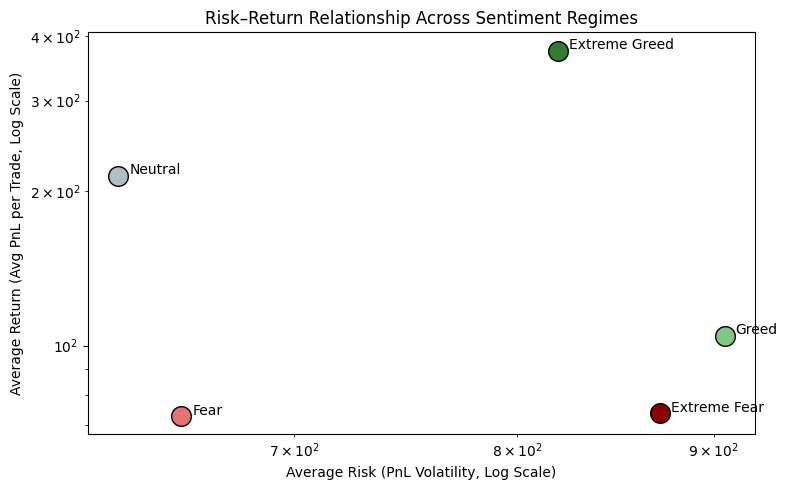

In [130]:
#Q3. Is higher return accompanied by higher risk?

sentiment_colors = {
    'Extreme Fear': '#8B0000',
    'Fear': '#E57373',
    'Neutral': '#B0BEC5',
    'Greed': '#81C784',
    'Extreme Greed': '#2E7D32'
}

risk_return_summary = (
    trader_sentiment_features
    .groupby('classification')
    .agg(
        avg_risk=('pnl_std', 'mean'),
        avg_return=('avg_pnl_per_trade', 'mean')
    )
    .reset_index()
)

plt.figure(figsize=(8,5))

for _, row in risk_return_summary.iterrows():
    plt.scatter(
        row['avg_risk'],
        row['avg_return'],
        s=200,
        color=sentiment_colors[row['classification']],
        edgecolor='black'
    )

    plt.annotate(
        row['classification'],
        (row['avg_risk'], row['avg_return']),
        textcoords="offset points",
        xytext=(8, 4),
        ha='left',
        va='center',
        fontsize=10
    )

plt.xscale('log')
plt.yscale('log')

plt.title("Risk–Return Relationship Across Sentiment Regimes")
plt.xlabel("Average Risk (PnL Volatility, Log Scale)")
plt.ylabel("Average Return (Avg PnL per Trade, Log Scale)")
plt.tight_layout()
plt.savefig("outputs/risk_return_by_sentiment.png")
plt.show()



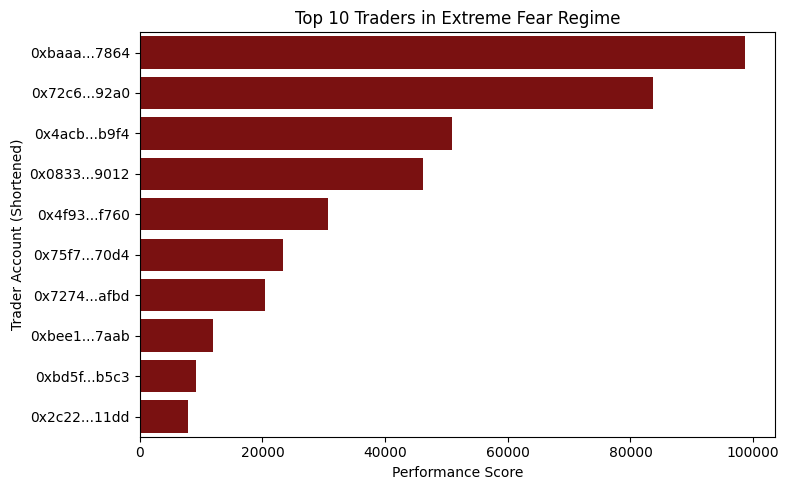

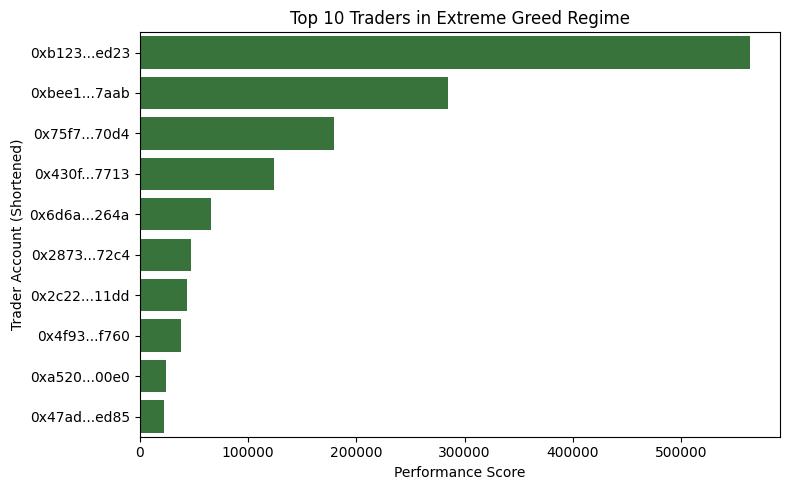

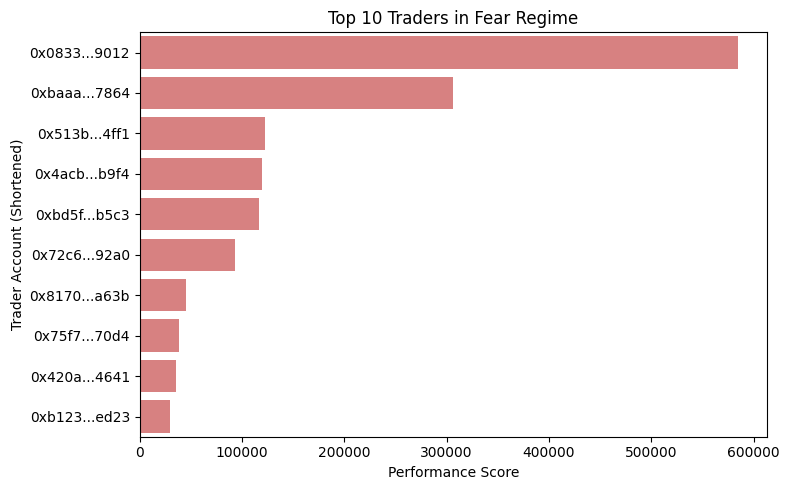

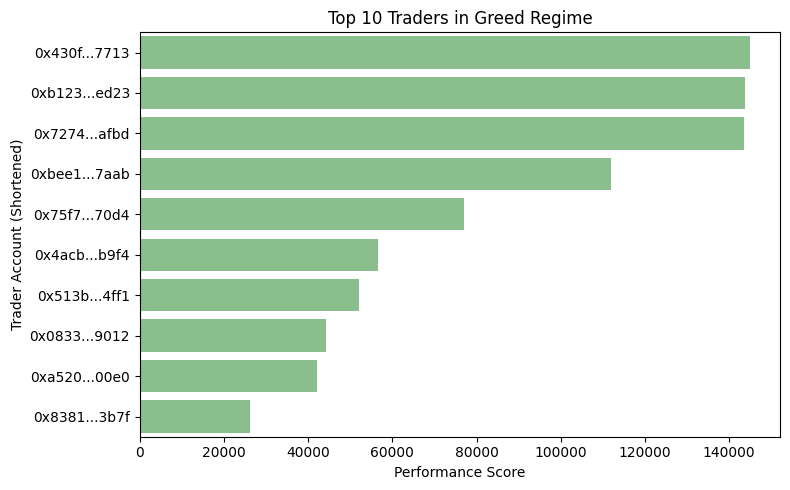

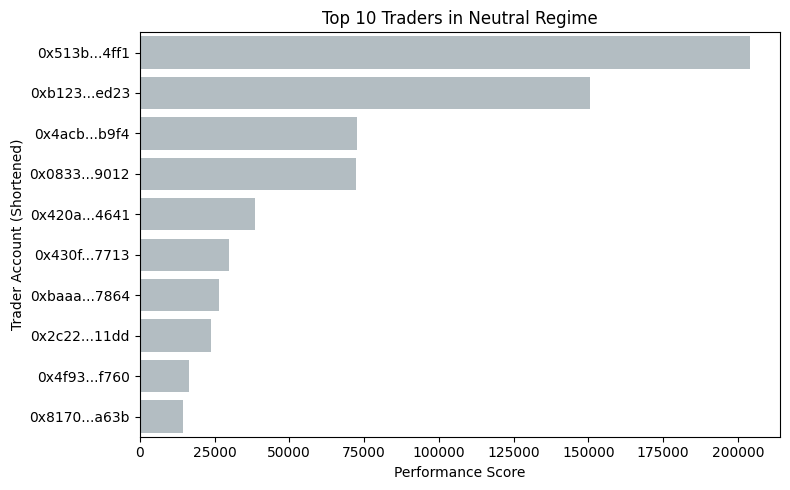

In [131]:
#Q4. Who performs best under each sentiment regime?

sentiment_colors = {
    'Extreme Fear': '#8B0000',
    'Fear': '#E57373',
    'Neutral': '#B0BEC5',
    'Greed': '#81C784',
    'Extreme Greed': '#2E7D32'
}

def shorten_account(addr):
    return addr[:6] + "..." + addr[-4:]

top_traders_by_sentiment['account_short'] = (
    top_traders_by_sentiment['account']
    .apply(shorten_account)
)

for sentiment in top_traders_by_sentiment['classification'].unique():

    data_subset = (
        top_traders_by_sentiment[
            top_traders_by_sentiment['classification'] == sentiment
        ]
        .sort_values('performance_score', ascending=False)
    )

    plt.figure(figsize=(8,5))

    sns.barplot(
        data=data_subset,
        x='performance_score',
        y='account_short',
        color=sentiment_colors[sentiment]  # single semantic color
    )

    plt.title(f"Top 10 Traders in {sentiment} Regime")
    plt.xlabel("Performance Score")
    plt.ylabel("Trader Account (Shortened)")

    plt.tight_layout()
    plt.savefig(f"outputs/top_traders_{sentiment}.png")
    plt.show()


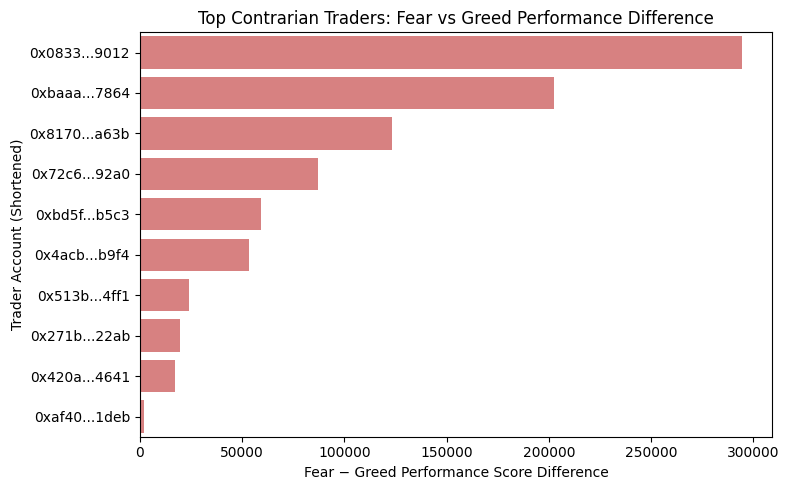

In [132]:
#Q5. Are there traders who outperform during Fear markets?

contrarian_traders = contrarian_traders.copy()

contrarian_traders['account_short'] = (
    contrarian_traders.index
    .map(lambda x: x[:6] + "..." + x[-4:])
)
contrarian_traders = contrarian_traders.sort_values(
    'fear_vs_greed_diff',
    ascending=False
)
plt.figure(figsize=(8,5))

sns.barplot(
    data=contrarian_traders,
    x='fear_vs_greed_diff',
    y='account_short',
    color=sentiment_colors['Fear']
)

plt.title("Top Contrarian Traders: Fear vs Greed Performance Difference")
plt.xlabel("Fear − Greed Performance Score Difference")
plt.ylabel("Trader Account (Shortened)")

plt.tight_layout()
plt.savefig("outputs/contrarian_traders.png")
plt.show()
